# WINE QUALITY PREDICTION

### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the dataset

In [2]:
wine_data = pd.read_csv('WineQT.csv')

### 1. Basic Dataset Information

In [3]:
print("Dataset Info:")
print(wine_data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [4]:
print("\nFirst 5 Rows:")
print(wine_data.head())


First 5 Rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5

### 2. Check for Missing Values

In [5]:
print("\nMissing Values:")
print(wine_data.isnull().sum())


Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


### 3. Basic Statistics

In [6]:
print("\nDataset Statistics:")
print(wine_data.describe())


Dataset Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000         

### 4. Class Distribution

In [7]:
print("\nClass Distribution (Quality):")
print(wine_data['quality'].value_counts())


Class Distribution (Quality):
quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


### 5. Feature Correlation Heatmap

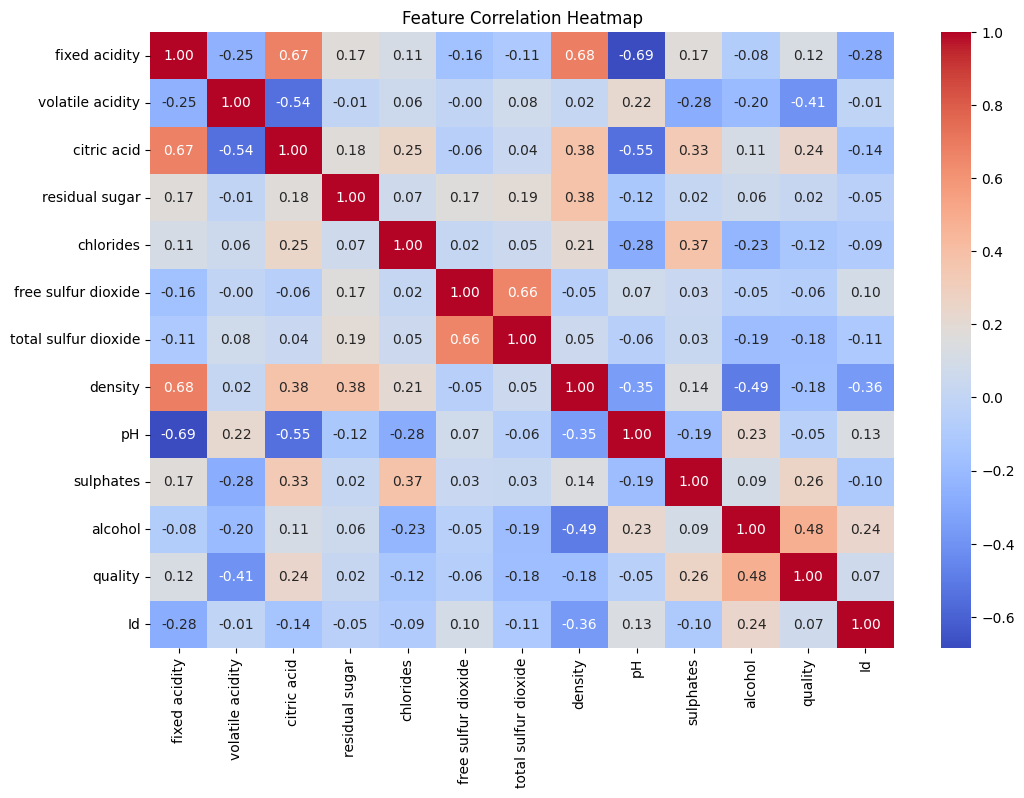

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### 6. Feature Distributions

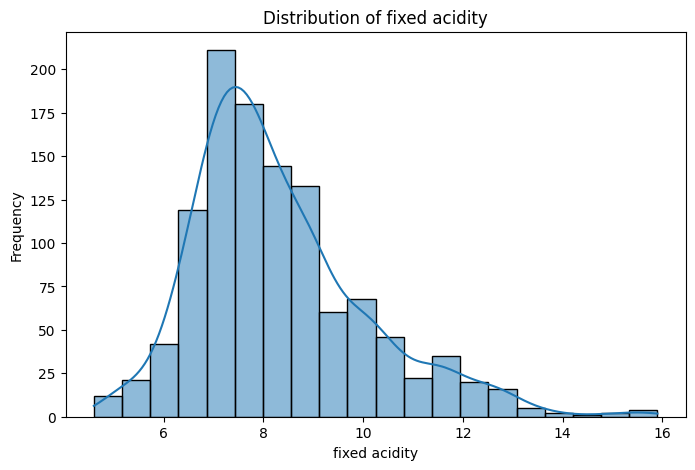

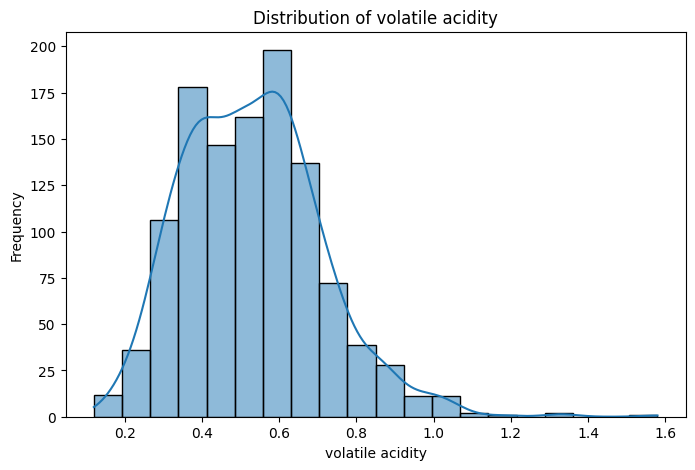

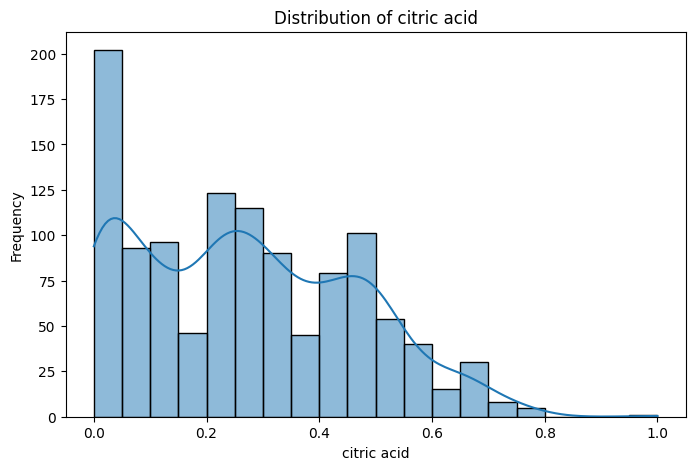

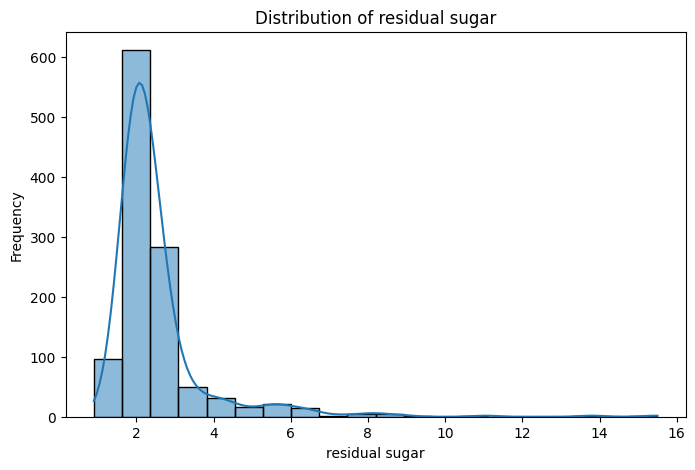

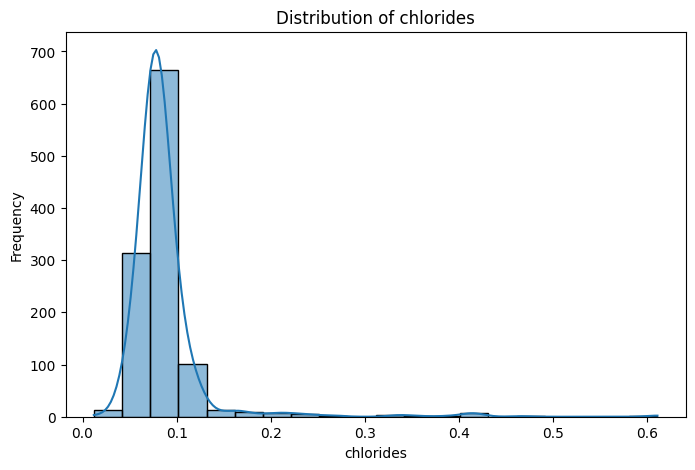

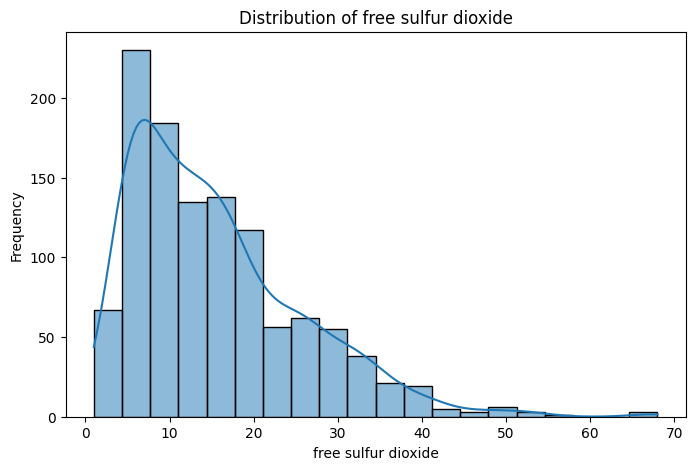

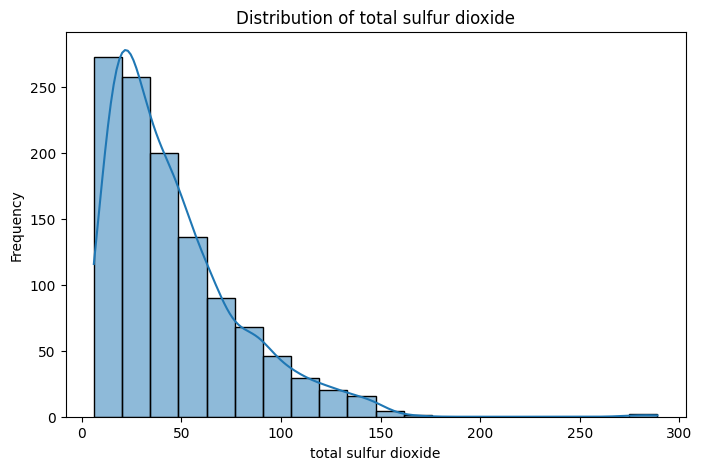

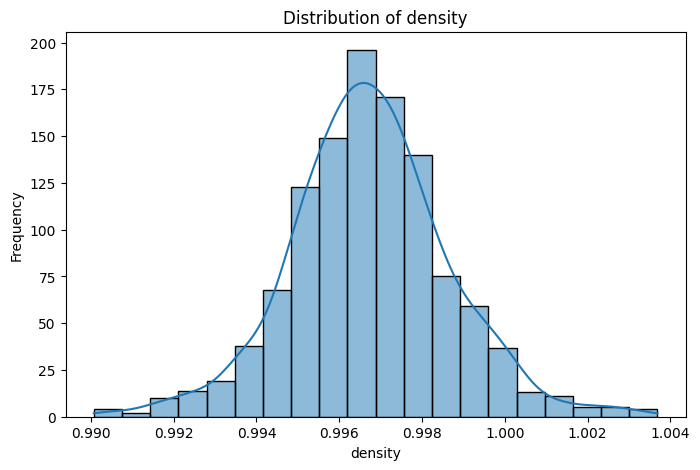

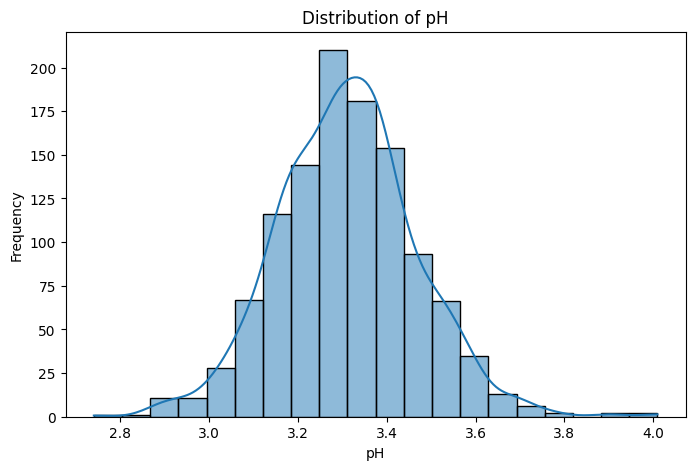

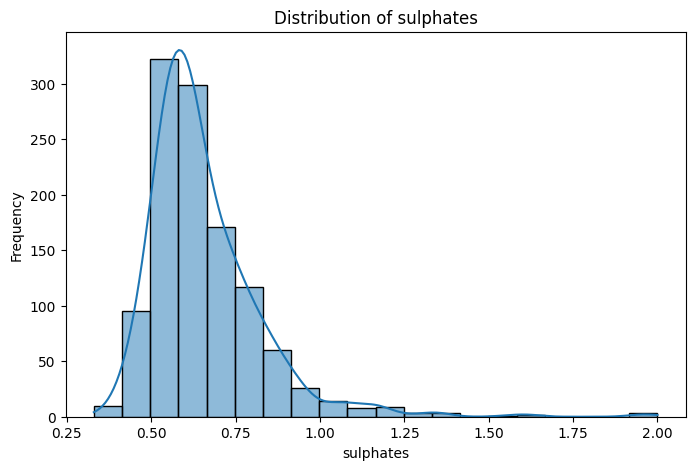

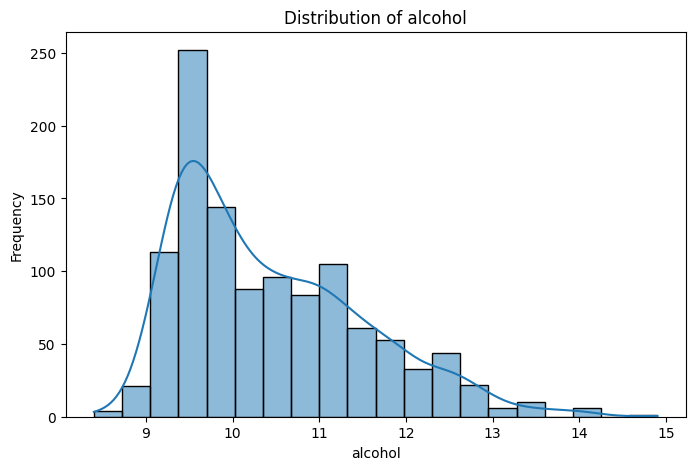

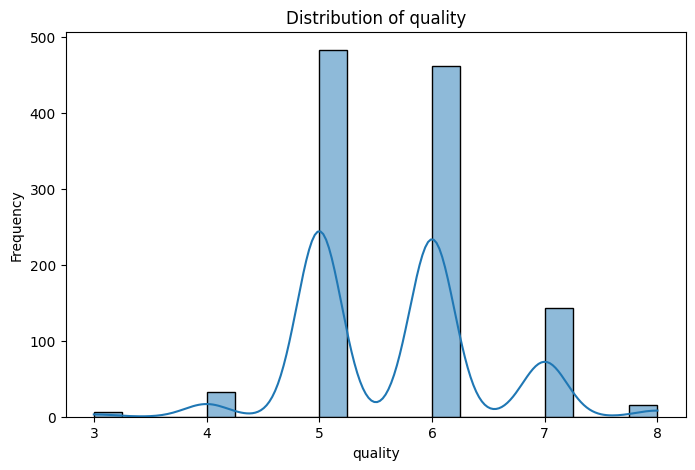

In [9]:
for column in wine_data.columns[:-1]:  # Skip 'Id' column
    plt.figure(figsize=(8, 5))
    sns.histplot(wine_data[column], kde=True, bins=20)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### 7. Data Preprocessing

In [11]:
# Drop unnecessary columns (e.g., 'Id')
wine_data = wine_data.drop(columns=['Id'], errors='ignore')

In [13]:
# Separate features and target
X = wine_data.drop(columns='quality')
y = wine_data['quality']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 8. Classifier Models

In [14]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SGD Classifier": SGDClassifier(random_state=42),
    "SVC": SVC(random_state=42)
}

In [16]:
# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
 # Evaluation Metrics
    print(f"Accuracy of {model_name}: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Confusion Matrix of {model_name}:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report of {model_name}:\n{classification_report(y_test, y_pred)}")
    


Training Random Forest...
Accuracy of Random Forest: 0.70
Confusion Matrix of Random Forest:
[[ 0  3  3  0  0]
 [ 0 77 18  1  0]
 [ 0 28 65  6  0]
 [ 0  0  8 18  0]
 [ 0  0  2  0  0]]
Classification Report of Random Forest:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.80      0.75        96
           6       0.68      0.66      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.67      0.70      0.68       229


Training SGD Classifier...
Accuracy of SGD Classifier: 0.50
Confusion Matrix of SGD Classifier:
[[ 0  0  0  0  0  0]
 [ 0  0  4  1  1  0]
 [ 1  0 77 13  5  0]
 [ 0  1 48 24 24  2]
 [ 0  0  5  7 14  0]
 [ 0  0  0  0  2  0]]
Classification Report of SGD Classifier:
              precisi

/home/akanksh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/akanksh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/akanksh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/akan